In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('../input/housesalesprediction/kc_house_data.csv') 

In [82]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [83]:
df.describe()



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [85]:
df.select_dtypes(include='number').corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='sqft_living', ylabel='price'>

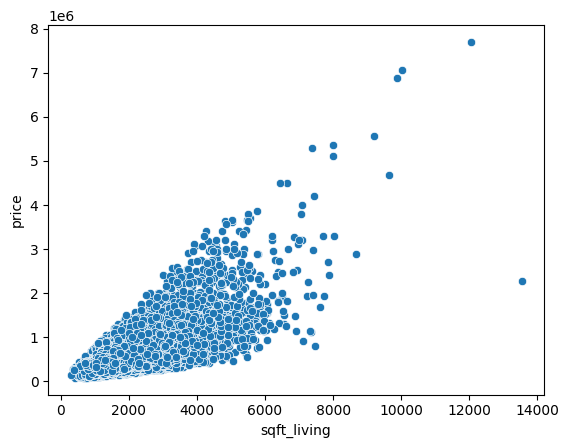

In [86]:
sns.scatterplot(x='sqft_living',y='price',data=df)

<Axes: xlabel='grade', ylabel='price'>

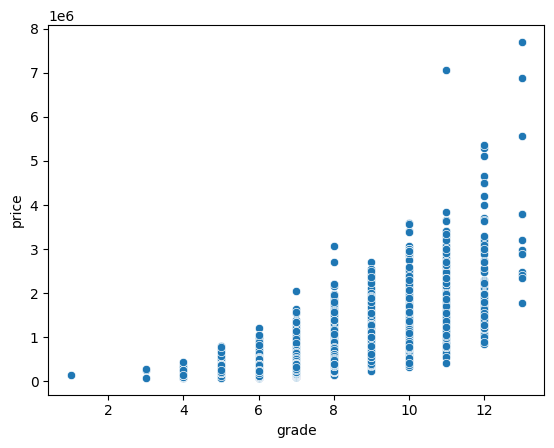

In [87]:
sns.scatterplot(x='grade',y='price',data=df)

In [88]:
df = df[df['sqft_living'] <= 7000]

In [89]:
df = df[df['bedrooms'] <= 8]

In [90]:
df = df[df['bedrooms'] > 0]

In [91]:
df = df[df['bathrooms'] > 0]


In [92]:
df = df[df['bathrooms'] < 6]


In [93]:
df = df[df['sqft_basement'] > 0]

In [94]:
df = df[df['sqft_basement'] < 2500]

<Axes: xlabel='sqft_basement', ylabel='price'>

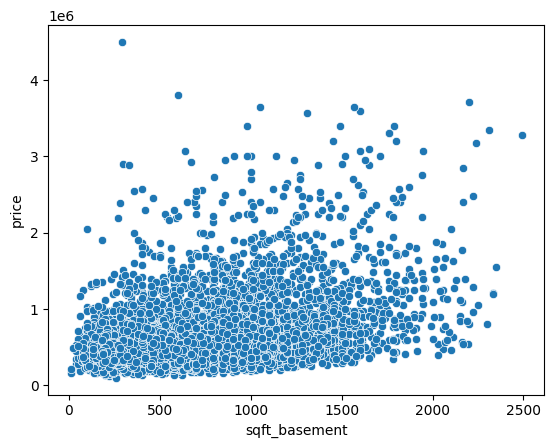

In [95]:
sns.scatterplot(x='sqft_basement',y='price',data=df)

In [96]:
df = df.drop('date', axis=1)


In [97]:
df = df.drop('id',axis=1)

In [98]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
10,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,414500.0,2,1.50,1210,1278,2.0,0,0,3,8,1020,190,2007,0,98117,47.6756,-122.375,1210,1118
21590,1222500.0,4,3.50,4910,9444,1.5,0,0,3,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063
21595,520000.0,2,2.25,1530,981,3.0,0,0,3,8,1480,50,2006,0,98103,47.6533,-122.346,1530,1282
21606,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200


In [99]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

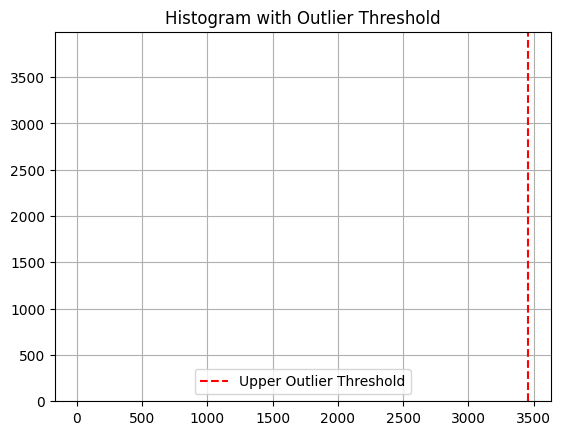

In [100]:
df['grade'].hist(bins=50)
plt.axvline(df['sqft_living15'].quantile(0.75) + 1.5 * (df['sqft_living15'].quantile(0.75) - df['sqft_living15'].quantile(0.25)), color='red', linestyle='dashed', label='Upper Outlier Threshold')
plt.legend()
plt.title('Histogram with Outlier Threshold')
plt.show()


In [101]:
num_cols=['sqft_living', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_living15', 'sqft_basement']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} выбросов")

sqft_living: 356 выбросов
bedrooms: 242 выбросов
bathrooms: 85 выбросов
sqft_above: 531 выбросов
sqft_living15: 326 выбросов
sqft_basement: 142 выбросов


In [102]:
df.select_dtypes(include='number').corr()['price'].sort_values()

zipcode         -0.048383
yr_built        -0.015783
long             0.009587
sqft_lot15       0.041864
sqft_lot         0.052968
condition        0.085152
yr_renovated     0.168826
bedrooms         0.245787
lat              0.261112
waterfront       0.290956
floors           0.355299
sqft_basement    0.370228
view             0.452656
bathrooms        0.493536
sqft_living15    0.603895
sqft_living      0.684952
sqft_above       0.687986
grade            0.692667
price            1.000000
Name: price, dtype: float64

In [122]:
df['price_log'] = np.log1p(df['price'])


In [123]:
X = df.drop('price_log',axis=1)
y = df['price_log']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
from sklearn.linear_model import ElasticNet

In [125]:
base_elastic_model = ElasticNet()

In [126]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5)

In [129]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [130]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [131]:
y_pred = grid_model.predict(X_test)

In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
mean_squared_error(y_test,y_pred)

0.029193636428572006

In [134]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.17


In [135]:
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

mse_exp = mean_squared_error(y_test_exp, y_pred_exp)
rmse_exp = np.sqrt(mse_exp)

print(f"RMSE в исходной шкале: {rmse_exp:.2f}")


RMSE в исходной шкале: 392799.74


In [136]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [137]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3)
xgb_model.fit(X_train, y_train,
              early_stopping_rounds=10,
              eval_set=[(X_test, y_test)],
              verbose=False)

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [138]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_xgb = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse:.4f}")

XGBoost RMSE: 0.0117


In [139]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [140]:
param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [141]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_xgb = GridSearchCV(estimator=xgb,
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error',
                        cv=3,
                        verbose=1,
                        n_jobs=-1)

grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5], 'n_estimators': [500, 1000],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [142]:
from sklearn.metrics import mean_squared_error
import numpy as np

best_model = grid_xgb.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Best XGBoost RMSE: {rmse:.4f}")
print("Best parameters:", grid_xgb.best_params_)

Best XGBoost RMSE: 0.0121
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 1.0}


In [143]:
import numpy as np
rmse_log = 0.0121
rmse_original = np.expm1(rmse_log)
print(rmse_original)


0.012173501155494489


In [144]:
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

from sklearn.metrics import mean_squared_error
rmse_exp = mean_squared_error(y_test_exp, y_pred_exp, squared=False)
print(f"RMSE в исходной шкале: {rmse_exp:.2f}")


RMSE в исходной шкале: 31408.39
